In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")
import statsmodels.api as sm
import re

In [57]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [58]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
X=train.iloc[:,2:]
X.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
y=train["Survived"]

In [61]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [62]:
X.shape

(891, 10)

In [63]:
train["Title"]=train["Name"].str.extract(r"([a-zA-Z]+\.)")
X["Title"]=train["Title"]

In [64]:
X.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


In [65]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


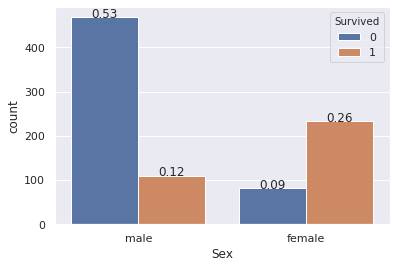

In [66]:
def get_percentage_on_top(axes):
    for p in axes.patches:
        height = p.get_height()
        axes.text(p.get_x()+p.get_width()/2,
                height,
                '{:.2f}'.format(height/total),
                ha="center")
    
total=len(X)
ax=sns.countplot("Sex",data=train,hue="Survived")
get_percentage_on_top(ax)

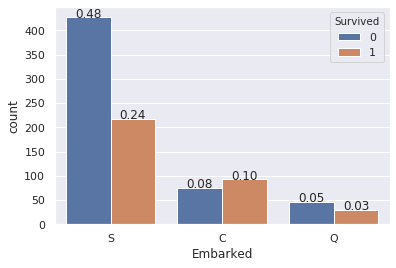

In [67]:
ax1=sns.countplot(x="Embarked",data=train,hue="Survived")
get_percentage_on_top(ax1)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

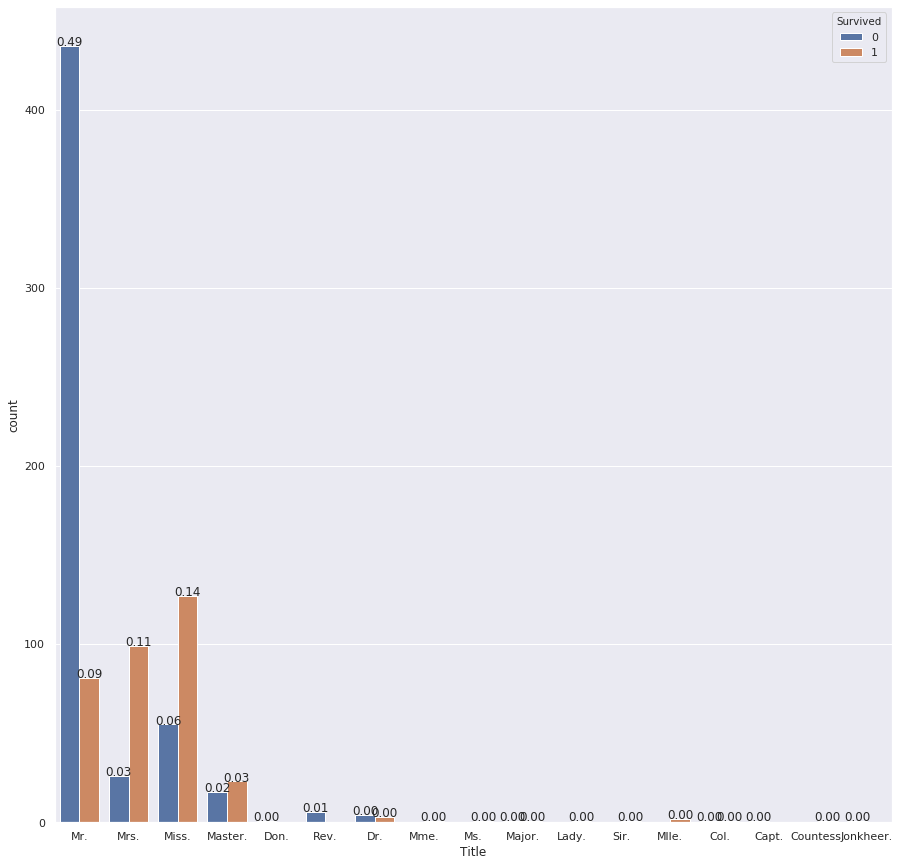

In [68]:
plt.figure(figsize=(15,15))
ax2=sns.countplot(x="Title",data=train,hue="Survived",)
get_percentage_on_top(ax2)

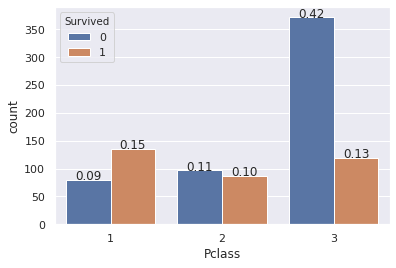

In [69]:
ax3=sns.countplot(x="Pclass",data=train,hue='Survived')
get_percentage_on_top(ax3)

In [70]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [71]:
train["Title"].replace("Ms.",'Miss.',inplace=True)
train["Title"].replace(train.Title.value_counts().index[4:],["Other"]*12,inplace=True)

In [72]:
train[train.Age.isnull()]["Title"].value_counts()

Mr.        119
Miss.       36
Mrs.        17
Master.      4
Other        1
Name: Title, dtype: int64

In [73]:
for i in train[train.Age.isnull()]["Title"].value_counts().index:
    cond=train["Title"]==i
    mean=train[cond].Age.mean()
    train.loc[cond,"Age"]=train.loc[cond,"Age"].fillna(mean)

In [74]:
train[train.Age.isnull()]["Title"].value_counts()

Series([], Name: Title, dtype: int64)

In [75]:
def age_group(age):
    if age <=20 :
        return "0-20"
    elif 20 < age <=40:
        return "21-40"
    elif 40 < age <=60:
        return "41-60"
    elif 40 < age <=80:
        return "61-80"
    else:
        return ">=80"
train["Age_Group"]=train["Age"].sort_values(ascending=True).apply(age_group)

In [76]:
train.Age_Group[:5]

0    21-40
1    21-40
2    21-40
3    21-40
4    21-40
Name: Age_Group, dtype: object

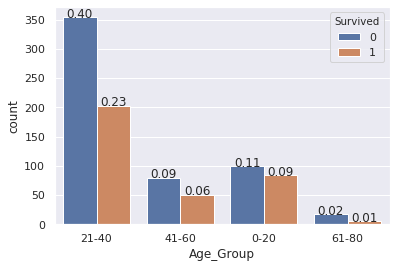

In [77]:
ax4=sns.countplot("Age_Group",data=train,hue="Survived")
get_percentage_on_top(ax4)

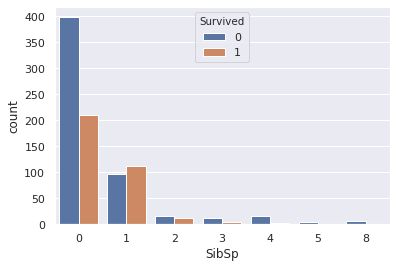

In [78]:
ax5=sns.countplot("SibSp",data=train,hue="Survived")


In [95]:
train.Embarked=train.Embarked.fillna(train.Embarked.mode())

In [96]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
Age_Group        0
dtype: int64